## A Hands-on Workshop series in Machine Learning
#### Instructor: Dr. Aashita Kesarwani


[CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10) is a popular dataset for image classification used in machine learning and computer vision. It consists of (32X32) color images (50,000 for training plus 10,000 for validation) in 10 classes labeled from 0 to 9: 

0. airplanes
1. cars 
2. birds
4. cats
5. deer
6. dogs
7. frogs 
8. horses
9. ships
10. trucks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')

c:\Users\Marwa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


50000 train samples
10000 validation samples


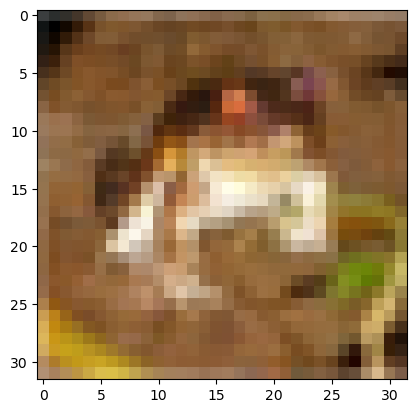

In [3]:
plt.imshow(X_train[0])
plt.show()

The labels are values between 0 and 9 corresponding to the class. This image is labelled 6 for frogs:

In [4]:
y_train[0]

array([6], dtype=uint8)

We will encode the labels as one-hot vectors so that they can be used more easily with our neural network later, since the network will output a vector of length 10 corresponding to how likely the image is a member of each class.

In [5]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)

Let us check the one-hot encoded vector for the first training example that is labeled as zero.

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

Let us define the network architecture for the CNN model. We will use [`Conv2D`](https://keras.io/layers/convolutional/) for the convolution layers, [`MaxPooling2D`](https://keras.io/layers/pooling/) for the pooling layers, [`Flatten`](https://keras.io/layers/core/#flatten) for flattening the feature maps, [`Dense`](https://keras.io/layers/core/#dense) for fully-connected layers and [`Dropout`](https://keras.io/layers/core/#dropout) for the dropout. 

For the [`Conv2D`](https://keras.io/layers/convolutional/), 
* the `filters` passes the number of filters
* the `kernel_size` passes the size of filters
* the `he_uniform` initializer is a way to initialize the weights that helps training
* the `'same'` padding means that the width and height of the output of the layer are the same as the input.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

input_shape = (32, 32, 3)

# Build and train the CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) # outputs a matrix with half width and height
model.add(Dropout(0.2)) # Dropout layers prevent overfitting, helping the model generalize

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\Marwa\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Now train the model:

In [8]:
batch_size = 64
num_classes = 10
epochs = 15

opt = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999) # Adam is one good optimizer function; lr is the learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 86ms/step - accuracy: 0.1337 - loss: 2.2672 - val_accuracy: 0.3327 - val_loss: 1.7791
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.3389 - loss: 1.7636 - val_accuracy: 0.4134 - val_loss: 1.5978
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.4126 - loss: 1.5888 - val_accuracy: 0.4648 - val_loss: 1.4695
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4595 - loss: 1.4817 - val_accuracy: 0.4956 - val_loss: 1.3821
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.4941 - loss: 1.3898 - val_accuracy: 0.5244 - val_loss: 1.3203
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.5258 - loss: 1.3126 - val_accuracy: 0.5708 - val_loss: 1.2030
Epoch 7/15
 78/782 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.5775 - loss: 1.2046

KeyboardInterrupt: 

In [ ]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

This may take a while to run (as the network has 550,570 parameters training on the dataset of 50,000 images). Once it's done, it should have reached roughly 65-70% test accuracy if you didn't change anything about the model. Not terrible given that there are 10 categories! With more sophisticated network architectures we can get this number higher and higher. 

Exercise: To get a better test accuracy and speed up learning, try tuning various hyperparameters of the network such as
* the number of layers 
* the type of layers
* the number of nodes in the layers
* the learning rate or using different optimizers such as Adam, RMSprop, AdaGrad, etc., 
* the dropout probability
* the activation functions 
* the number of epochs
* the batch size